# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.217223e+01     8.297336e+00
 * time: 0.004887819290161133
     1     2.609645e+01     4.424296e+00
 * time: 0.01530599594116211
     2     1.915383e+01     4.314437e+00
 * time: 0.037760019302368164
     3     1.856909e+01     6.312709e+00
 * time: 0.0613398551940918
     4     1.319913e+01     2.122083e+00
 * time: 0.08550596237182617
     5     1.109996e+01     9.462019e-01
 * time: 0.10885787010192871
     6     1.024226e+01     1.544097e+00
 * time: 0.12966299057006836
     7     9.765511e+00     7.752032e-01
 * time: 0.14789485931396484
     8     9.539459e+00     8.575178e-01
 * time: 0.16589593887329102
     9     9.381973e+00     6.430653e-01
 * time: 0.18444180488586426
    10     9.210515e+00     6.748437e-01
 * time: 0.20376992225646973
    11     9.040170e+00     4.453190e-01
 * time: 0.2247629165649414
    12     8.946506e+00     9.344493e-01
 * time: 0.2397449016571045
    13     8.805813e+00     7.058642e-01
 * time: 

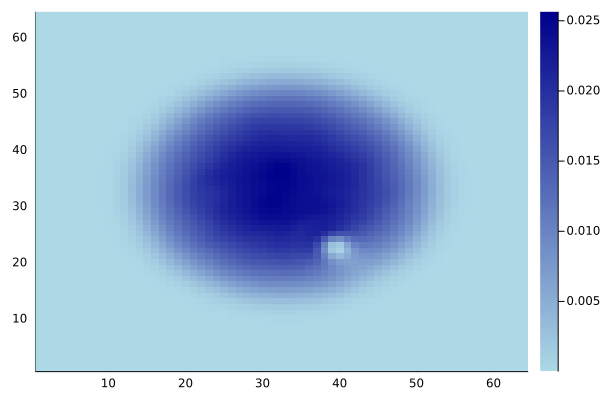

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)